In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage

In [68]:
transform = transforms.Compose([transforms.ToTensor(), # [0,1]
                                transforms.Normalize((0.5,) , (0.5,)) # Normalize
                               ])


In [69]:
trainset = tv.datasets.MNIST('./MNIST/' , train = True , transform = transform,  download = True)
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size = 4,
    shuffle = True,
    num_workers = 2
)


In [70]:
testset = tv.datasets.MNIST('./MNIST/', train = False,  transform = transform , download = True)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size = 4,
    shuffle = False,
    num_workers = 2
)

In [71]:
# !ls 

In [72]:
classes = ('0','1','2','3','4','5','6','7','8','9')
# for i in range(10):
#     classes.append(str(i))
# classes

Exception ignored in: <function _DataLoaderIter.__del__ at 0x113d7ab70>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 717, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 713, in _shutdown_workers
    w.join()
  File "/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 140, in join
    res = self._popen.wait(timeout)
  File "/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/popen_fork.py", line 48, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt: 


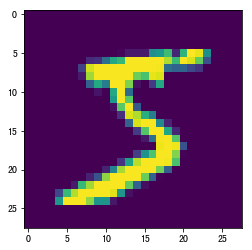

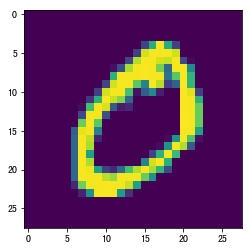

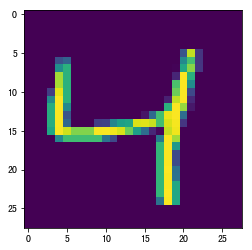

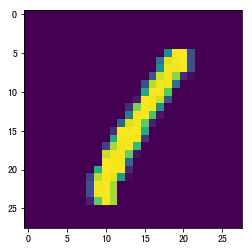

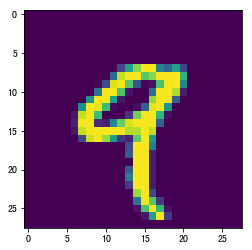

In [73]:
%matplotlib inline
# show some pictures
import matplotlib.pyplot  as plt
for i in range(5):
    plt.figure()
    plt.imshow(trainloader.dataset.data[i].numpy())

In [83]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5,self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 5, padding = 2)        
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16*5*5 , 120)
        self.fc2 = nn.Linear(120, 84) 
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
#         卷积  , 激活 , 池化
        x = F.max_pool2d(F.tanh(self.conv1(x)), (2,2))
#         正则化
        x = F.dropout(x , p = 0.3 , training = self.training)
        
        x = F.max_pool2d(F.tanh(self.conv2(x)), 2)
        
        x = F.dropout(x, p = 0.3, training = self.training)
        
        x = x.view(x.size()[0], -1)
#         全连接layer: 
        x = F.tanh(self.fc1(x))
    
        x = F.dropout(x , p = 0.3, training = self.training)
        
        x = F.tanh(self.fc2(x))
        
        x = F.dropout(x , p = 0.3, training = self.training)
        
        x = self.fc3(x)
        return x

LeNet = LeNet5()
LeNet

LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [84]:
# loss -> criterion
# backward
# optim
# 
learning_rate = 0.001
epochs = 10

from torch import optim
criterion = nn.CrossEntropyLoss()
Adam_optimizer = torch.optim.Adam(LeNet.parameters() , lr = learning_rate , betas = (0.9,0.99)) 


In [86]:
torch.set_num_threads(8)
for epoch in range(2):
    
    running_loss = 0.0
    for i , data in enumerate(trainloader , 0):
        inputs , labels = data
        
        Adam_optimizer.zero_grad()
        
        outputs = LeNet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        
        Adam_optimizer.step()
        running_loss += loss.item()
        if i % 1000 == 999 :
            print( '[%d, %5d] loss: %.3f' %(epoch + 1 , i + 1, running_loss/1000)) 
            running_loss = 0.0

[1,  1000] loss: 0.751
[1,  2000] loss: 0.356
[1,  3000] loss: 0.304
[1,  4000] loss: 0.285
[1,  5000] loss: 0.283
[1,  6000] loss: 0.260
[1,  7000] loss: 0.239
[1,  8000] loss: 0.222
[1,  9000] loss: 0.217
[1, 10000] loss: 0.214
[1, 11000] loss: 0.202
[1, 12000] loss: 0.224
[1, 13000] loss: 0.192
[1, 14000] loss: 0.202
[1, 15000] loss: 0.180
[2,  1000] loss: 0.179
[2,  2000] loss: 0.176
[2,  3000] loss: 0.183
[2,  4000] loss: 0.180
[2,  5000] loss: 0.187
[2,  6000] loss: 0.179
[2,  7000] loss: 0.188
[2,  8000] loss: 0.175
[2,  9000] loss: 0.182
[2, 10000] loss: 0.161
[2, 11000] loss: 0.204
[2, 12000] loss: 0.170
[2, 13000] loss: 0.162
[2, 14000] loss: 0.174
[2, 15000] loss: 0.148


In [98]:
def test():
    test_loss = 0
    correct = 0
    for data, target in testloader:
        output = LeNet(data)
        test_loss += criterion(output, target)
        pred = output.data.max(1, keepdim = True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
     
    test_loss /= len(testloader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct , len(testloader.dataset), 100. * correct / len(testloader.dataset)))
    

In [99]:
for epoch in range(2):
    test()



Test set: Average loss: 0.0445, Accuracy: 9485/10000 (94%)


Test set: Average loss: 0.0461, Accuracy: 9452/10000 (94%)

